In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


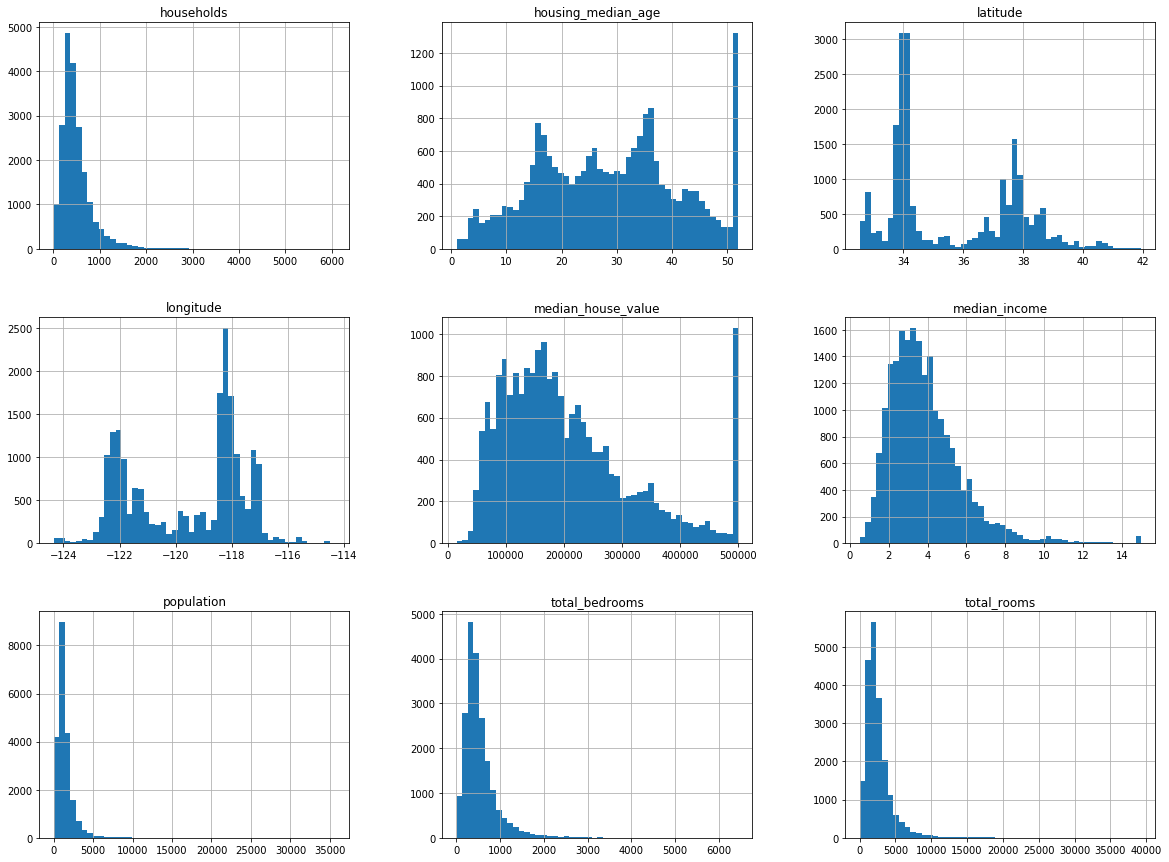

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

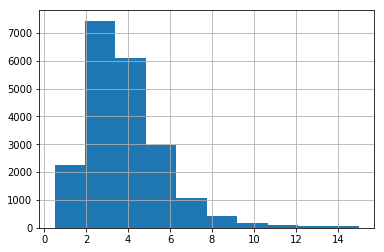

In [7]:
# median income looks like a important feature

housing["median_income"].hist()

import numpy as np

In [8]:
# dividing the income category to limit the number of income category

housing["income_cat"] = np.ceil(housing['median_income']/1.5)

# putting everything above 5th category as 5th category

housing["income_cat"].where(housing['income_cat'] < 5, other=5.0, inplace= True)


#housing["ocean_proximity"].value_counts()

In [9]:
## train and test set

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [10]:
housing["income_cat"].value_counts() /len(housing)

#test_set.head()

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
# now check the proportion for test and train set

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

## Rule: Use stratified sampling for mid size datasets and attributes are less than 15

In [12]:
## droping the "income_cat" 

for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis =1, inplace=True)

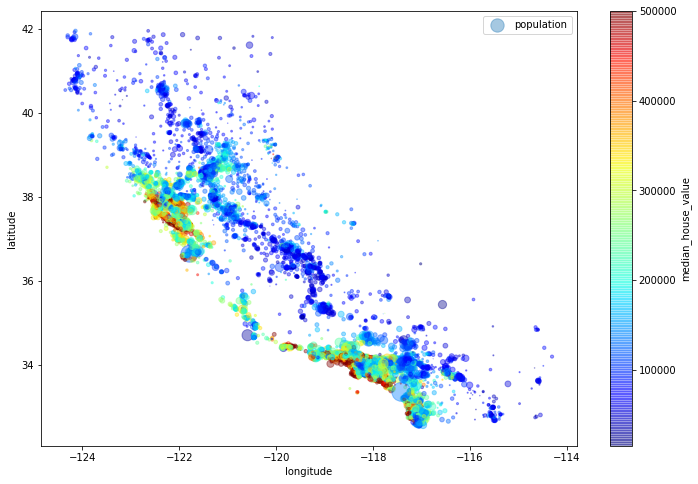

In [13]:
##Lets vizualize the dataset wrt the Latitude and Longitude

## Copy the train set as housing

housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

In [14]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018832BFD160>,
      dtype=object)

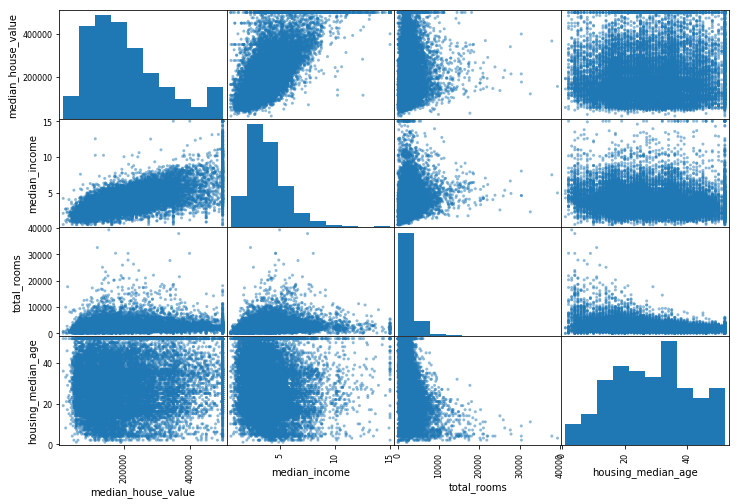

In [15]:
# Check correlations between attributes

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

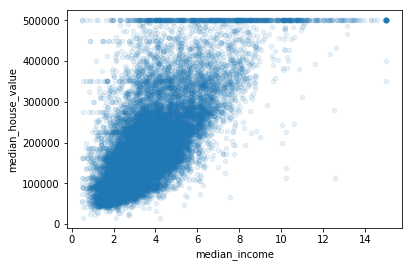

In [16]:
## let's see the correlation between median_house_value and median_income

housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

## Feature engineering

In [17]:
## creating new attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_rooms         -0.253572
Name: median_house_value, dtype: float64

[0, 5, 0, 520000]

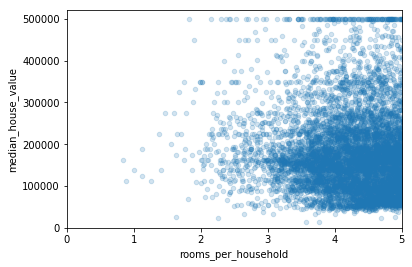

In [20]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha = 0.2)
plt.axis([0,5,0,520000])

# Preparing the data for ML algo

In [21]:
## Droping the Y values from the train data set

housing = strat_train_set.drop("median_house_value", axis =1)

housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
## Imputing Scikit Learn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ="median")

In [23]:
# Keeping only the numerical attributes and dropping the categorical ones

housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [24]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [25]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [26]:
X = imputer.transform(housing_num)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [28]:
## Cross check for mising values

housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [29]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


## Handling categorical values

In [30]:
# handling text and categorical attributes
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [31]:
## Converting into categorical features using panda's own factorize() method

housing_cat_encoded, housing_categories = housing_cat.factorize()

In [32]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [33]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [34]:
## other way is by SciKit learn one hot encoder
## returns a sparse array

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

C:\Users\Bedanta.Gogoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
## Need to convert the sparse array to Dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

## Custom transformation

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
                
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
                
housing_extra_attribs = attr_adder.transform(housing.values)                    

In [39]:
## adding the three columns
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household",
                                                                                          "population_per_household"])

In [40]:
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


## Setting up Pipeline for all the preprocessing of numerical attributes

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [42]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y= None):
        return self #do nothing
    def transform(self, X, y= None):
        return X[self.attribute_names].values

## Complete Pipeline

In [43]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [44]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [45]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Selecting and Training Models

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
## trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [48]:
print("Prediction:", lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(some_labels))

Prediction: [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels: [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [50]:
lin_rmse = np.sqrt(lin_mse)

lin_rmse

67949.91466225038

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross validation

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(score):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [-4.80641951e+09 -4.98500777e+09 -4.63711404e+09 -5.21401094e+09
 -4.85756998e+09 -4.48332592e+09 -4.90370705e+09 -5.02605874e+09
 -4.46574298e+09 -4.74867321e+09]
mean: -4812763013.047308
std deviation: 225918948.56767738


In [55]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores: [-4.80641951e+09 -4.98500777e+09 -4.63711404e+09 -5.21401094e+09
 -4.85756998e+09 -4.48332592e+09 -4.90370705e+09 -5.02605874e+09
 -4.46574298e+09 -4.74867321e+09]
mean: -4812763013.047308
std deviation: 225918948.56767738


In [56]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

C:\Users\Bedanta.Gogoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=29, verbose=0, warm_start=False)

In [57]:
housing_pred = forest_reg.predict(housing_prepared)

In [58]:
forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores: [-4.80641951e+09 -4.98500777e+09 -4.63711404e+09 -5.21401094e+09
 -4.85756998e+09 -4.48332592e+09 -4.90370705e+09 -5.02605874e+09
 -4.46574298e+09 -4.74867321e+09]
mean: -4812763013.047308
std deviation: 225918948.56767738


## Fine tune model

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
## to get best combinations of hyperparameter

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [61]:
# to get the best estimators directly

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [62]:
cv_res = grid_search.cv_results_

for mean_score, param in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), param)

63674.154138899125 {'max_features': 2, 'n_estimators': 3}
54784.042227702426 {'max_features': 2, 'n_estimators': 10}
51937.29839441742 {'max_features': 2, 'n_estimators': 30}
59328.47000598717 {'max_features': 4, 'n_estimators': 3}
51870.90522547194 {'max_features': 4, 'n_estimators': 10}
49922.71071003069 {'max_features': 4, 'n_estimators': 30}
58720.00252550263 {'max_features': 6, 'n_estimators': 3}
51889.48697567654 {'max_features': 6, 'n_estimators': 10}
49541.4949268063 {'max_features': 6, 'n_estimators': 30}
58487.265821997615 {'max_features': 8, 'n_estimators': 3}
51167.74389218533 {'max_features': 8, 'n_estimators': 10}
49482.3333051195 {'max_features': 8, 'n_estimators': 30}
61312.610680092 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53737.22530511822 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58932.1634720414 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51909.73218080673 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [63]:
df = pd.DataFrame(grid_search.cv_results_)

C:\Users\Bedanta.Gogoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bedanta.Gogoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bedanta.Gogoi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099334,0.009412,0.004390,0.000488,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.978055e+09,-4.079032e+09,...,-4.054398e+09,7.402814e+07,18,-1.065484e+09,-1.114238e+09,-1.142588e+09,-1.113172e+09,-1.069853e+09,-1.101067e+09,2.927270e+07
1,0.302194,0.018658,0.012567,0.000798,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.905521e+09,-2.989289e+09,...,-3.001291e+09,8.210666e+07,11,-5.438907e+08,-5.762246e+08,-5.763851e+08,-5.960847e+08,-5.557290e+08,-5.696628e+08,1.813677e+07
2,1.063563,0.110287,0.040892,0.004549,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.726051e+09,-2.601739e+09,...,-2.697483e+09,5.392122e+07,9,-4.275888e+08,-4.241773e+08,-4.117011e+08,-4.202568e+08,-4.126511e+08,-4.192750e+08,6.250683e+06
3,0.162167,0.006694,0.004788,0.000399,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.510510e+09,-3.446782e+09,...,-3.519867e+09,6.383391e+07,16,-9.222545e+08,-8.627604e+08,-9.676720e+08,-9.199210e+08,-9.051890e+08,-9.155594e+08,3.368932e+07
4,0.540558,0.025112,0.013166,0.000747,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.788911e+09,-2.527791e+09,...,-2.690591e+09,1.566567e+08,6,-5.253712e+08,-5.055910e+08,-4.911741e+08,-5.122257e+08,-5.013593e+08,-5.071442e+08,1.139271e+07
5,2.008727,0.228471,0.042287,0.003488,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.536996e+09,-2.349898e+09,...,-2.492277e+09,1.075858e+08,3,-3.858848e+08,-3.806474e+08,-3.910698e+08,-3.713765e+08,-3.716918e+08,-3.801341e+08,7.757446e+06
6,0.252725,0.014467,0.005384,0.000490,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.366404e+09,-3.340059e+09,...,-3.448039e+09,1.112708e+08,14,-8.955674e+08,-8.820222e+08,-9.376990e+08,-9.013462e+08,-8.510041e+08,-8.935278e+08,2.813193e+07
7,0.805849,0.024632,0.014163,0.000747,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.655572e+09,-2.527307e+09,...,-2.692519e+09,9.405926e+07,7,-4.950988e+08,-5.178151e+08,-4.846132e+08,-5.168932e+08,-4.678954e+08,-4.964631e+08,1.913997e+07
8,1.913551,0.275417,0.030518,0.001003,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.385226e+09,-2.351255e+09,...,-2.454360e+09,8.747418e+07,2,-3.732135e+08,-3.666278e+08,-3.735506e+08,-3.740326e+08,-3.644644e+08,-3.703778e+08,4.012396e+06
9,0.201875,0.004614,0.004176,0.000406,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.526985e+09,-3.305529e+09,...,-3.420760e+09,8.193392e+07,13,-9.007919e+08,-8.924481e+08,-8.644721e+08,-8.962385e+08,-8.868630e+08,-8.881627e+08,1.269656e+07


In [69]:
## tray randomized search cv

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_disibs = {
    'n_estimators':randint(low=1, high=200),
    'max_features':randint(low=1, high=8)
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distibs, n_iter=10, cv = 5,
                                scoring="neg_mean_squared_error", random_state=29)
rnd_search.fit(housing_prepared, housing_labels)

NameError: name 'params_distibs' is not defined